In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

pd.set_option('display.max_columns', 100)

In [2]:
hr = pd.read_excel('hr.xlsx')

# EDA

In [3]:
hr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1470 non-null   int64  
 1   Attrition                 1205 non-null   object 
 2   BusinessTravel            1470 non-null   object 
 3   DailyRate                 1470 non-null   int64  
 4   Department                1470 non-null   object 
 5   DistanceFromHome          1470 non-null   int64  
 6   Education                 1470 non-null   int64  
 7   EducationField            1470 non-null   object 
 8   EmployeeCount             1470 non-null   int64  
 9   EmployeeNumber            1470 non-null   int64  
 10  EnvironmentSatisfaction   1470 non-null   int64  
 11  Gender                    1470 non-null   object 
 12  HourlyRate                1470 non-null   int64  
 13  JobInvolvement            1470 non-null   int64  
 14  JobLevel

In [4]:
hr.isnull().sum()

Age                           0
Attrition                   265
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome               265
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtC

In [5]:
hr.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993.0,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130.0,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090.0,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909.0,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468.0,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [6]:
hr.MaritalStatus.unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

In [7]:
hr.MaritalStatus.value_counts()

Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtype: int64

In [8]:
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1205.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6523.930290,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4756.215086,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1051.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2897.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4936.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8237.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [9]:
hr.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,-0.004892,0.504376,0.028051,0.299635,0.003634,0.001904,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,0.030571,0.009597,-0.032182,0.038153,0.022704,0.000473,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.009285,0.027473,-0.029251,0.040235,0.027110,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.095758,-0.026084,0.126317,-0.011111,-0.024539,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,-0.046247,-0.015974,0.012648,-0.001251,-0.012944,-0.020359,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.005332,0.037600,0.012594,-0.031701,-0.029548,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.010333,-0.015297,0.022157,-0.009062,-0.002172,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.019477,-0.016322,0.015012,-0.017205,-0.029071,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.951287,0.039563,0.142501,-0.034730,-0.021222,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


## Regression

In [10]:
miss = hr.isnull().sum()
miss[miss>0]

Attrition        265
MonthlyIncome    265
dtype: int64

In [11]:
data = hr.copy()
del data['Attrition']

In [12]:
data.isnull().sum()

Age                           0
BusinessTravel                0
DailyRate                     0
Department                    0
DistanceFromHome              0
Education                     0
EducationField                0
EmployeeCount                 0
EmployeeNumber                0
EnvironmentSatisfaction       0
Gender                        0
HourlyRate                    0
JobInvolvement                0
JobLevel                      0
JobRole                       0
JobSatisfaction               0
MaritalStatus                 0
MonthlyIncome               265
MonthlyRate                   0
NumCompaniesWorked            0
Over18                        0
OverTime                      0
PercentSalaryHike             0
PerformanceRating             0
RelationshipSatisfaction      0
StandardHours                 0
StockOptionLevel              0
TotalWorkingYears             0
TrainingTimesLastYear         0
WorkLifeBalance               0
YearsAtCompany                0
YearsInC

In [13]:
missing = data[data['MonthlyIncome'].isnull()]
filled = data[data['MonthlyIncome'].notnull()]

In [14]:
missing.shape, filled.shape

((265, 34), (1205, 34))

In [15]:
filled.corr()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.017555,0.003074,0.215022,NaN,-0.030078,0.017511,0.010490,0.026380,0.524683,-0.002142,0.504376,0.030861,0.281257,-0.007668,-0.017728,0.054784,NaN,0.007166,0.678289,-0.007230,-0.032737,0.323413,0.209129,0.221807,0.214771
DailyRate,0.017555,1.000000,0.005963,-0.014068,NaN,-0.047483,0.035487,0.015392,0.027986,0.002527,0.024612,0.009597,-0.034968,0.038203,0.029811,0.000068,-0.010120,NaN,0.052685,0.005077,-0.019137,-0.058334,-0.043150,0.010441,-0.034099,-0.028570
DistanceFromHome,0.003074,0.005963,1.000000,0.035379,NaN,0.020763,-0.030170,0.027519,0.033623,0.006032,-0.005838,-0.009285,0.045875,-0.016143,0.039423,0.028285,0.013337,NaN,0.062579,0.017436,-0.033804,-0.016886,0.007022,0.023506,0.014140,0.014597
Education,0.215022,-0.014068,0.035379,1.000000,NaN,0.045023,-0.024908,-0.006329,0.066902,0.103864,-0.014474,0.095758,-0.029582,0.125083,-0.019455,-0.029513,-0.015992,NaN,-0.004353,0.157465,-0.016219,0.012274,0.079556,0.067478,0.062813,0.081593
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.030078,-0.047483,0.020763,0.045023,NaN,1.000000,0.028064,-0.004309,0.006398,-0.019065,-0.041587,-0.015974,0.008877,-0.017408,-0.024460,-0.046639,-0.085285,NaN,0.044376,-0.022418,0.016559,0.014841,-0.010650,-0.011192,-0.003753,-0.012552
EnvironmentSatisfaction,0.017511,0.035487,-0.030170,-0.024908,NaN,0.028064,1.000000,-0.046590,-0.013060,-0.003212,0.000359,-0.005332,0.031333,0.006870,-0.046696,-0.041666,-0.001946,NaN,0.003917,-0.004758,-0.015246,0.036916,0.000836,0.023155,0.016795,-0.010579
HourlyRate,0.010490,0.015392,0.027519,-0.006329,NaN,-0.004309,-0.046590,1.000000,0.041263,-0.019858,-0.058157,-0.010333,-0.026831,0.026877,-0.002272,0.007760,-0.001814,NaN,0.038181,-0.008770,-0.010727,-0.004388,-0.032050,-0.041045,-0.033828,-0.034277
JobInvolvement,0.026380,0.027986,0.033623,0.066902,NaN,0.006398,-0.013060,0.041263,1.000000,-0.014145,-0.017064,-0.019477,-0.026837,0.019130,-0.005307,-0.019707,0.027719,NaN,0.039984,-0.003143,-0.019101,-0.015039,-0.011509,0.014308,-0.008718,0.034495
JobLevel,0.524683,0.002527,0.006032,0.103864,NaN,-0.019065,-0.003212,-0.019858,-0.014145,1.000000,-0.013625,0.951287,0.031863,0.135199,-0.029989,-0.022727,0.035728,NaN,0.001562,0.791560,-0.003407,0.033094,0.547500,0.390848,0.364095,0.388201


In [16]:
abs(filled.corr()['MonthlyIncome'].sort_values(ascending=False))

MonthlyIncome               1.000000
JobLevel                    0.951287
TotalWorkingYears           0.780438
YearsAtCompany              0.527649
Age                         0.504376
YearsInCurrentRole          0.365401
YearsWithCurrManager        0.357689
YearsSinceLastPromotion     0.350071
NumCompaniesWorked          0.138344
Education                   0.095758
RelationshipSatisfaction    0.035059
MonthlyRate                 0.023419
WorkLifeBalance             0.020497
DailyRate                   0.009597
StockOptionLevel            0.002759
EnvironmentSatisfaction     0.005332
TrainingTimesLastYear       0.006785
DistanceFromHome            0.009285
HourlyRate                  0.010333
PerformanceRating           0.012966
JobSatisfaction             0.013752
EmployeeNumber              0.015974
JobInvolvement              0.019477
PercentSalaryHike           0.023454
EmployeeCount                    NaN
StandardHours                    NaN
Name: MonthlyIncome, dtype: float64

In [17]:
from scipy import stats
est = stats.linregress(x=filled['TotalWorkingYears'], y=filled['MonthlyIncome'])

In [18]:
est

LinregressResult(slope=472.6981466032999, intercept=1187.737022203578, rvalue=0.7804379598380539, pvalue=1.2815494054484267e-247, stderr=10.91829318795265, intercept_stderr=150.12148601790045)

In [19]:
est.slope

472.6981466032999

In [20]:
est.intercept

1187.737022203578

In [21]:
def predict(x):
    return est.slope * x + est.intercept # mx + b

In [22]:
predict(2)

2133.1333154101776

In [23]:
r2_score(filled['MonthlyIncome'], predict(filled.TotalWorkingYears))

0.6090834091561835

In [24]:
mean_squared_error(filled['MonthlyIncome'], filled['TotalWorkingYears'].apply(predict))**.5

2972.5095419789172

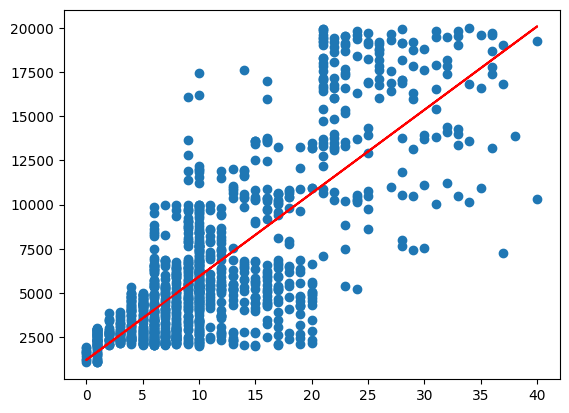

In [25]:
plt.scatter(filled['TotalWorkingYears'], filled['MonthlyIncome'])
plt.plot(filled.TotalWorkingYears, predict(filled.TotalWorkingYears), c='r');

## Multi-Variable Regression

In [26]:
filled.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 1469
Data columns (total 34 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Age                       1205 non-null   int64  
 1   BusinessTravel            1205 non-null   object 
 2   DailyRate                 1205 non-null   int64  
 3   Department                1205 non-null   object 
 4   DistanceFromHome          1205 non-null   int64  
 5   Education                 1205 non-null   int64  
 6   EducationField            1205 non-null   object 
 7   EmployeeCount             1205 non-null   int64  
 8   EmployeeNumber            1205 non-null   int64  
 9   EnvironmentSatisfaction   1205 non-null   int64  
 10  Gender                    1205 non-null   object 
 11  HourlyRate                1205 non-null   int64  
 12  JobInvolvement            1205 non-null   int64  
 13  JobLevel                  1205 non-null   int64  
 14  JobRole 

In [27]:
filled.select_dtypes(exclude='number').head()

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Y,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,Y,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Y,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Y,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,Y,No


In [28]:
x = pd.get_dummies(filled, drop_first=True)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 1469
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1205 non-null   int64  
 1   DailyRate                          1205 non-null   int64  
 2   DistanceFromHome                   1205 non-null   int64  
 3   Education                          1205 non-null   int64  
 4   EmployeeCount                      1205 non-null   int64  
 5   EmployeeNumber                     1205 non-null   int64  
 6   EnvironmentSatisfaction            1205 non-null   int64  
 7   HourlyRate                         1205 non-null   int64  
 8   JobInvolvement                     1205 non-null   int64  
 9   JobLevel                           1205 non-null   int64  
 10  JobSatisfaction                    1205 non-null   int64  
 11  MonthlyIncome                      1205 non-null   float

In [29]:
filled.select_dtypes(exclude='number').nunique()

BusinessTravel    3
Department        3
EducationField    6
Gender            2
JobRole           9
MaritalStatus     3
Over18            1
OverTime          2
dtype: int64

In [30]:
x=pd.get_dummies(filled, drop_first=True)
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1205 entries, 0 to 1469
Data columns (total 47 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Age                                1205 non-null   int64  
 1   DailyRate                          1205 non-null   int64  
 2   DistanceFromHome                   1205 non-null   int64  
 3   Education                          1205 non-null   int64  
 4   EmployeeCount                      1205 non-null   int64  
 5   EmployeeNumber                     1205 non-null   int64  
 6   EnvironmentSatisfaction            1205 non-null   int64  
 7   HourlyRate                         1205 non-null   int64  
 8   JobInvolvement                     1205 non-null   int64  
 9   JobLevel                           1205 non-null   int64  
 10  JobSatisfaction                    1205 non-null   int64  
 11  MonthlyIncome                      1205 non-null   float

In [31]:
L=LinearRegression()
pred=L.fit(x.drop('MonthlyIncome', axis=1), x.MonthlyIncome).predict(x.drop('MonthlyIncome', axis=1))
pred

array([5847.45618523, 5262.40598848, 2850.2655657 , ..., 5753.87104661,
       6309.93005008, 5148.0137686 ])

In [32]:
mean_squared_error(x['MonthlyIncome'], pred)**.5

1085.8711186054825

In [33]:
r2_score(x['MonthlyIncome'], pred)

0.9478332054077498

In [34]:
R=Ridge()
pred_r=R.fit(x.drop('MonthlyIncome', axis=1), x.MonthlyIncome).predict(x.drop('MonthlyIncome', axis=1))
pred_r

array([5834.2605767 , 5293.95505142, 2841.37636749, ..., 5745.39839116,
       6293.44689497, 5179.32147099])

In [35]:
mean_squared_error(x['MonthlyIncome'], pred_r)**.5

1086.4423647219965

In [36]:
r2_score(x['MonthlyIncome'], pred_r)

0.9477783040169663

In [37]:
La=Lasso()
pred_l=R.fit(x.drop('MonthlyIncome', axis=1), x.MonthlyIncome).predict(x.drop('MonthlyIncome', axis=1))
pred_l

array([5834.2605767 , 5293.95505142, 2841.37636749, ..., 5745.39839116,
       6293.44689497, 5179.32147099])

In [38]:
mean_squared_error(x['MonthlyIncome'], pred_l)**.5

1086.4423647219965

In [39]:
r2_score(x['MonthlyIncome'], pred_l)

0.9477783040169663